# Lab 1
Nathan Ansel, Shania Tirkey

In [17]:
import monkdata as m

### Assignment 0

### Assignment 1

In [18]:
from dtree import entropy

In [19]:
print(entropy(m.monk1))
print(entropy(m.monk2))
print(entropy(m.monk3))

1.0
0.957117428264771
0.9998061328047111


### Assignment 2

A uniform distribution will have higher entropy as compared to a non-uniform distribution. A non-uniform distribution will have peaks or modes; it will have a range of values which are more likely to appear than other values, which reduces the overall uncertainty. This is very similar to the entropy of a real die and a fake die. A real die follows a discrete uniform distribution whereas a fake die follows a non-uniform distribution, and a real die has a higher entropy.

We can observe the following distributions and their entropies.

In [20]:
from tools import calculate_entropy, generate_samples

In [21]:
uniform_samples = [
    generate_samples('uniform', x) for x in range(10, 2500, 10)
]
uniform_entropy = [
    calculate_entropy(samples) for samples in uniform_samples
]

# for entropy in uniform_entropy:
#     print(entropy)

In [22]:
non_uniform_samples = [
    generate_samples('non_uniform', x) for x in range(10, 2500, 10)
]
non_uniform_entropy = [
    calculate_entropy(samples) for samples in non_uniform_samples
]

# for entropy in non_uniform_entropy:
#     print(entropy)

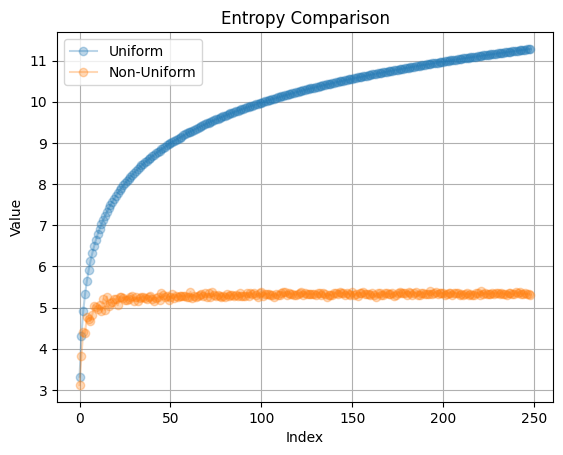

In [23]:
import matplotlib.pyplot as plt

plt.plot(uniform_entropy, label='Uniform', marker='o', alpha=0.3)
plt.plot(non_uniform_entropy, label='Non-Uniform', marker='o', alpha=0.3)

plt.title('Entropy Comparison')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


In [31]:
import numpy as np 

non_uniform = [round(num) for num in np.random.normal(0, 10, 10**5)]
uniform = range(0, 10**5)

print(f"Non uniform: {calculate_entropy(non_uniform)}")
print(f"Uniform: {calculate_entropy(uniform)}")

Non uniform: 5.365894265828007
Uniform: 16.60964047441802


### Assignment 3

In [24]:
from dtree import averageGain

In [25]:
for i, monk in enumerate([m.monk1, m.monk2, m.monk3]):
    print(f"Monk {i+1}")
    for attribute in m.attributes:
        print(f"   {repr(attribute)}: {averageGain(monk, attribute):.5f}")

Monk 1
   A1: 0.07527
   A2: 0.00584
   A3: 0.00471
   A4: 0.02631
   A5: 0.28703
   A6: 0.00076
Monk 2
   A1: 0.00376
   A2: 0.00246
   A3: 0.00106
   A4: 0.01566
   A5: 0.01728
   A6: 0.00625
Monk 3
   A1: 0.00712
   A2: 0.29374
   A3: 0.00083
   A4: 0.00289
   A5: 0.25591
   A6: 0.00708


### Assignment 4

### Assignment 5

In [26]:
from dtree import select

### Assignment 6

### Assignment 7